<a href="https://colab.research.google.com/github/ZynTran/ANN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
image_size = 64
dataset_path = kagglehub.dataset_download("ppduyn/nhandienkhuonmat")
face_folder = os.path.join(dataset_path, "AI", "Nhận diện khuôn mặt")
emotion_folder = os.path.join(dataset_path, "AI", "Cảm xúc")
def load_data_with_pandas(folder_path):
    data = []
    labels = []
    class_names = sorted(os.listdir(folder_path))
    class_df = pd.DataFrame(class_names, columns=["class_name"])
    for i, row in class_df.iterrows():
        class_name = row['class_name']
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder): continue
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0
                data.append(img)
                labels.append(i)
            else:
                continue
    data = np.array(data)
    labels = to_categorical(labels, num_classes=len(class_names))
    return data, labels, class_names

face_data, face_labels, face_classes = load_data_with_pandas(face_folder)
emotion_data, emotion_labels, emotion_classes = load_data_with_pandas(emotion_folder)

X_face_train, X_face_test, y_face_train, y_face_test = train_test_split(face_data, face_labels, test_size=0.2, random_state=42)
X_emotion_train, X_emotion_test, y_emotion_train, y_emotion_test = train_test_split(emotion_data, emotion_labels, test_size=0.2, random_state=42)

def build_cnn_model(num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(528, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
models = {
    'face': build_cnn_model(len(face_classes)),
    'emotion': build_cnn_model(len(emotion_classes))
}
models['face'].fit(X_face_train, y_face_train, epochs=20, validation_data=(X_face_test, y_face_test), batch_size=32)
models['emotion'].fit(X_emotion_train, y_emotion_train, epochs=20, validation_data=(X_emotion_test, y_emotion_test), batch_size=32)


100%|██████████| 63.3M/63.3M [00:00<00:00, 107MB/s] 

Extracting files...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2500 - loss: 1.5910 - val_accuracy: 0.6667 - val_loss: 0.8913
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4583 - loss: 1.7315 - val_accuracy: 0.6667 - val_loss: 0.9681
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4583 - loss: 1.7861 - val_accuracy: 0.6667 - val_loss: 1.1391
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.4167 - loss: 1.3729 - val_accuracy: 0.6667 - val_loss: 1.1338
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5417 - loss: 1.2278 - val_accuracy: 0.6667 - val_loss: 1.1045
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4583 - loss: 1.4218 - val_accuracy: 0.6667 - val_loss: 1.1338
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4583 - loss: 1.2387 - val_accuracy: 0.6667 - val_loss: 1.1438
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5833 - loss: 1.2169 - val_accuracy: 0.6667 - val_loss: 1.139

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


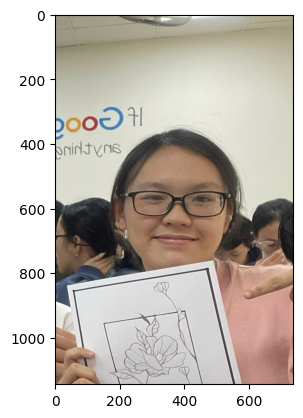

('Thuỳ Linh', 'Vui')

In [10]:
from PIL import Image
def predict_face_and_emotion(image_path):
    img = Image.open(image_path)
    img_resized = img.resize((image_size, image_size))
    img_norm = np.array(img_resized) / 255.0
    input_img = np.expand_dims(img_norm, axis=0)
    face_pred = models['face'].predict(input_img)
    face_label = face_classes[np.argmax(face_pred)]
    emotion_pred = models['emotion'].predict(input_img)
    emotion_label = emotion_classes[np.argmax(emotion_pred)]
    plt.imshow(img)
    plt.show()
    return face_label, emotion_label
image_path = "hinh5.jpg"
predict_face_and_emotion(image_path)